## Libraries to use

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import re
from statsmodels.formula.api import ols
import numpy as np

# FIRST PART

In [54]:
def count(target):
    S = [2,3,4]
    # if the total is 0, return 1
    if target == 0:
        return 1
 
    # return 0 if total becomes negative
    if target < 0:
        return 0
 
    # initialize the total number of ways to 0
    result = 0
 
    # do for each ball
    for c in S:
        # recur to see if total can be reached by including current ball `c`
        result += count(target - c)
 
    # return the total number of ways
    return result


In [55]:
if __name__ == '__main__':
 
    # `n` ball of given denominations
    S = [2, 3, 4]
 
    # total points
    target = 8
 
    print('The total number of ways is', count(target))

The total number of ways is 8


## The time complexity of the above solution is exponential since each recursive call is making n recursive calls. 

#                                               SECOND PART

In [57]:
# Load data for each company and convert to a pandas dataframe
df_r1_c1 = pd.read_csv('datasets/region1_company1.csv')
df_r1_c2 = pd.read_csv('datasets/region1_company2.csv')
df_r2_c1 = pd.read_csv('datasets/region2_company1.csv')
df_r2_c2 = pd.read_csv('datasets/region2_company2.csv')
df_r1_c1.head()

,Sales_U,Sales_USD,Date
0,124885,129350,JAN0591.1
1,105285,107408,JAN1291.1
2,138363,136313,JAN1991.1
3,111494,113805,JAN2691.1
4,110686,113761,FEB0291.1


In [58]:
# Define string date to convert the columns date to an easily readable string
def string_date(string):
    string = re.sub("[A-Za-z]+", lambda ele: " " + ele[0] + " ", string)
    string = string[1:4] + ' ' + (' '.join([string[5:9][i:i+2] for i in range(0, len(string[5:9]), 2)]))
    string = string.replace(' ','-')
    return string

In [59]:
# Apply the function string_date to each dataframe
df_r1_c1.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )
df_r1_c2.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )
df_r2_c1.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )
df_r2_c2.Date = df_r1_c1.Date.apply(lambda x: string_date(x) )

In [5]:
# Convert to datetime each column Date of each pandas dataframe
df_r1_c1.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r1_c2.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r2_c1.Date = df_r1_c1.Date.astype('datetime64[D]')
df_r2_c2.Date = df_r1_c1.Date.astype('datetime64[D]')

## Question 1

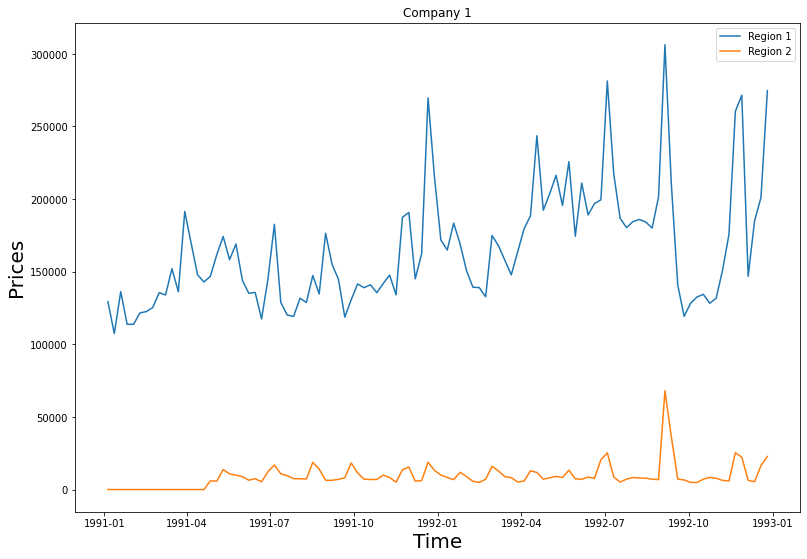

In [42]:
# plot prices vs time for company 1, region 1
plt.figure(figsize=(13,9))
plt.title("Company 1")
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Prices", fontsize = 20)
plt.plot(df_r1_c1.Date,df_r1_c1.Sales_USD)
plt.plot(df_r2_c1.Date,df_r2_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

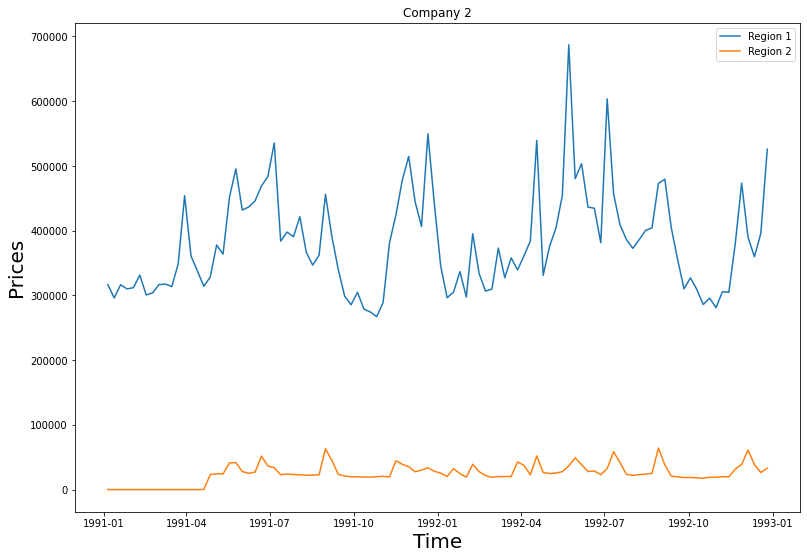

In [41]:
# plot prices vs time for company 1, region 2
plt.figure(figsize=(13,9))
plt.title("Company 2")
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Prices", fontsize = 20)
plt.plot(df_r1_c2.Date,df_r1_c2.Sales_USD)
plt.plot(df_r2_c2.Date,df_r2_c2.Sales_USD)
plt.legend(['Region 1','Region 2'])

## The similarities are that in both companies region 1 is more expensive than region 2, on the other hand, region 2 of company 2 is less susceptible to price changes than region 2 of company 1.

## Questio 2

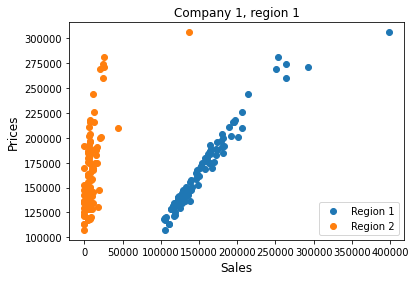

In [43]:
# scatterplot prices vs sales for company 1
plt.title("Company 1, region 1")
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.scatter(df_r1_c1.Sales_U,df_r1_c1.Sales_USD)
plt.scatter(df_r2_c1.Sales_U,df_r1_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

## Region 1 is more elastic because the change in price produces a significant change in sales.






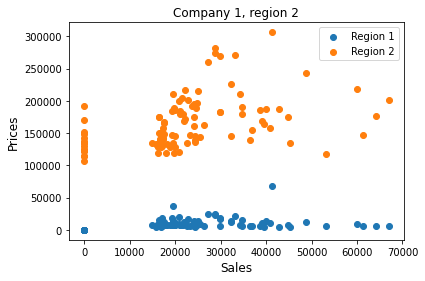

In [38]:
# scatterplot prices vs sales for company 2
plt.title("Company 1, region 2")
plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.scatter(df_r2_c2.Sales_U,df_r2_c1.Sales_USD)
plt.scatter(df_r2_c2.Sales_U,df_r1_c1.Sales_USD)
plt.legend(['Region 1','Region 2'])

## Region 2 is more elastic because the change in price produces a significant change in sales. In region 1 the price is almost constant

## Question 3

## Price elasticity of demand for region 1, company 1

In [13]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r1_c1 = ols("Sales_U ~ Sales_USD", data=df_r1_c1).fit()
print(result_r1_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1201.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           3.13e-58
Time:                        13:08:52   Log-Likelihood:                -1127.8
No. Observations:                 104   AIC:                             2260.
Df Residuals:                     102   BIC:                             2265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.18e+04   5199.178     -4.192      0.0

In [14]:
# intercept_r1_c1: initial price
# slope_r1_c1: slope of the line sales vs price
# mean_price_r1_c1 = mean of the price
# mean_quantity_r1_c1 = mean of the sales
intercept_r1_c1, slope_r1_c1 = result_r1_c1.params
mean_price_r1_c1 = np.mean(df_r1_c1.Sales_USD)
mean_quantity_r1_c1 = np.mean(df_r1_c1.Sales_U)

In [15]:
#Price elasticity Formula
price_elasticity_r1_c1 = (slope_r1_c1)*(mean_price_r1_c1/mean_quantity_r1_c1)  
print('price elasticity of demand for company 1 in region 1:', price_elasticity_r1_c1)

price elasticity of demand for company 1 in region 1: 1.1422119379726128


## Price elasticity of demand for region 2, company 1

In [16]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r2_c1 = ols("Sales_U ~ Sales_USD", data=df_r2_c1).fit()
print(result_r2_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     851.5
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.59e-51
Time:                        13:08:53   Log-Likelihood:                -1027.1
No. Observations:                 104   AIC:                             2058.
Df Residuals:                     102   BIC:                             2063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5162.3732    681.306     -7.577      0.0

In [17]:
# intercept_r2_c1: initial price
# slope_r2_c1: slope of the line sales vs price
# mean_price_r2_c1 = mean of the price
# mean_quantity_r2_c1 = mean of the sales
intercept_r2_c1, slope_r2_c1 = result_r2_c1.params
mean_price_r2_c1 = np.mean(df_r2_c1.Sales_USD)
mean_quantity_r2_c1 = np.mean(df_r2_c1.Sales_U)

In [18]:
#Price elasticity Formula
price_elasticity_r2_c1 = (slope_r2_c1)*(mean_price_r2_c1/mean_quantity_r2_c1)  
print('price elasticity of demand for company 1 in region 2:', price_elasticity_r2_c1)

price elasticity of demand for company 1 in region 2: 1.552692722951739


## Price elasticity of demand for region 1, company 2

In [19]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r1_c2 = ols("Sales_U ~ Sales_USD", data=df_r1_c2).fit()
print(result_r1_c2.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4332.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.27e-85
Time:                        13:08:54   Log-Likelihood:                -1120.1
No. Observations:                 104   AIC:                             2244.
Df Residuals:                     102   BIC:                             2250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.331e+04   5674.482     -2.345      0.0

In [20]:
# intercept_r1_c2: initial price
# slope_r1_c2: slope of the line sales vs price
# mean_price_r1_c2 = mean of the price
# mean_quantity_r1_c2 = mean of the sales
intercept_r1_c2, slope_r1_c2 = result_r1_c2.params
mean_price_r1_c2 = np.mean(df_r1_c2.Sales_USD)
mean_quantity_r1_c2 = np.mean(df_r1_c2.Sales_U)

In [21]:
#Price elasticity Formula
price_elasticity_r1_c2 = (slope_r1_c2)*(mean_price_r1_c2/mean_quantity_r1_c2)  
print('price elasticity of demand for company 1 in region 2:', price_elasticity_r1_c2)

price elasticity of demand for company 1 in region 2: 1.0377414144487425


## Price elasticity of demand for region 2, company 2

In [22]:
# We will use ordinary linear regression to find the slope. To do that, we'll use the statsmodels library.
result_r2_c2 = ols("Sales_U ~ Sales_USD", data=df_r2_c2).fit()
print(result_r2_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                Sales_U   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     851.5
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.59e-51
Time:                        13:08:55   Log-Likelihood:                -1027.1
No. Observations:                 104   AIC:                             2058.
Df Residuals:                     102   BIC:                             2063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5162.3732    681.306     -7.577      0.0

In [23]:
# intercept_r2_c2: initial price
# slope_r2_c2: slope of the line sales vs price
# mean_price_r2_c2 = mean of the price
# mean_quantity_r2_c2 = mean of the sales
intercept_r2_c2, slope_r2_c2 = result_r2_c2.params
mean_price_r2_c2 = np.mean(df_r2_c2.Sales_USD)
mean_quantity_r2_c2 = np.mean(df_r2_c2.Sales_U)

In [24]:
#Price elasticity Formula
price_elasticity_r2_c2 = (slope_r2_c2)*(mean_price_r2_c2/mean_quantity_r2_c2)  
print('price elasticity of demand for company 1  in region 2:', price_elasticity_r2_c2)

price elasticity of demand for company 1  in region 2: 1.0770426006732474


## Absolute magnitud of the price elasticity of demand for company 1

In [31]:
print('price elasticity of demand for company 1:', np.absolute(price_elasticity_r1_c1 + price_elasticity_r2_c1))

price elasticity of demand for company 1: 2.694904660924352


## Absolute magnitud of the price elasticity of demand for company 2


In [33]:
print('price elasticity of demand for company 2:', np.absolute(price_elasticity_r1_c2 + price_elasticity_r2_c2))

price elasticity of demand for company 2: 2.11478401512199


## Question 4

## To calculate  the % change in unit sales we'll use:
$$\Delta Q=\:\frac{\Delta P.E.Q}{P}$$
$$\Delta Q: Change in the sales$$
$$\Delta P: Change in the price$$
$$Q: Sales$$
$$P: Price$$
$$E: Price elasticity of demand$$




In [27]:
change_in_quantity = (0.1*1.1422119379726128*mean_quantity_r1_c1)/mean_price_r1_c1
print('the change in unit sales in company 1 for region 1 is:',change_in_quantity )

the change in unit sales in company 1 for region 1 is: 0.10573093076400639


## Question 5

## Company 1 presents a greater vulnerability since, having a larger price elasticity demand, changes in sales are more elastic to changes in prices.

## Question 6

## Cross-price effects are an incomplete study of the data. To make a broader study of the data, we can explore the seasonality, trends and other properties of the time series of the companies. If we do that, the model could predict sales and price based on time.